#### About Dataset
Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Source: https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

In [6]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# Importing the dataset
data = pd.read_csv('diabetes.csv')
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
589,0,73,0,0,0,21.1,0.342,25,0
203,2,99,70,16,44,20.4,0.235,27,0
632,2,111,60,0,0,26.2,0.343,23,0
408,8,197,74,0,0,25.9,1.191,39,1
119,4,99,76,15,51,23.2,0.223,21,0
501,3,84,72,32,0,37.2,0.267,28,0
559,11,85,74,0,0,30.1,0.300,35,0
446,1,100,72,12,70,25.3,0.658,28,0
71,5,139,64,35,140,28.6,0.411,26,0
130,4,173,70,14,168,29.7,0.361,33,1


### Exploring data

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above summary statistics, we observe that several features have a minimum value of 0, which is not realistic for certain physiological measurements. Specifically, the features:
- Glucose, 
- Blood Pressure
- Skin Thickness
- Insulin and 
- BMI 

all have a minimum value of 0.

To further investigate and understand the distribution of these features, we will plot univariate graphs for each feature.

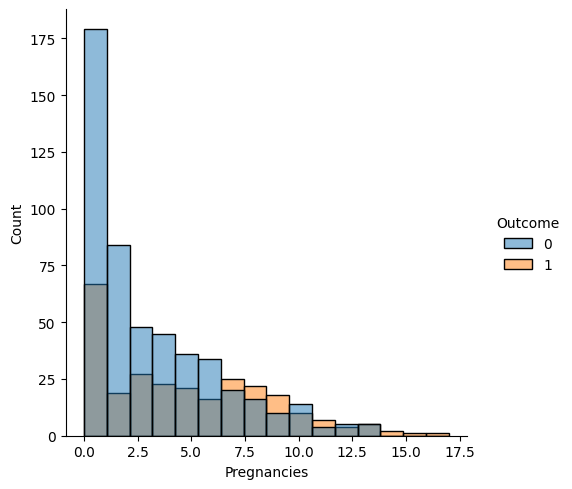

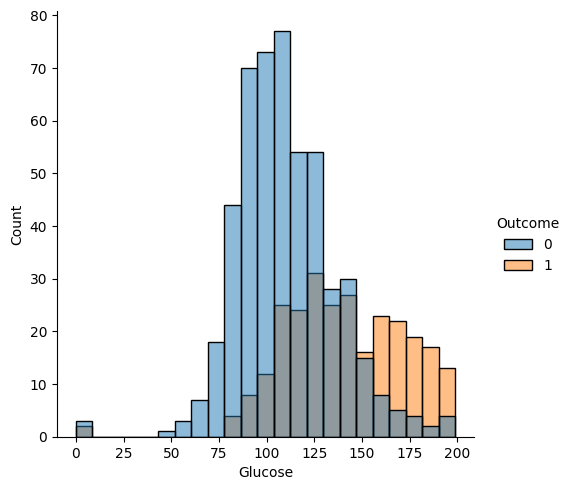

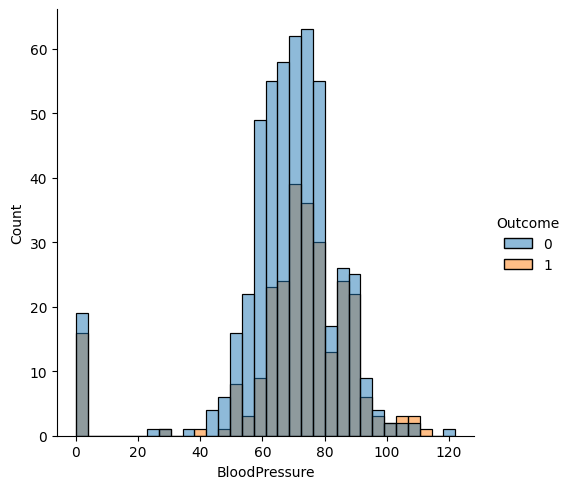

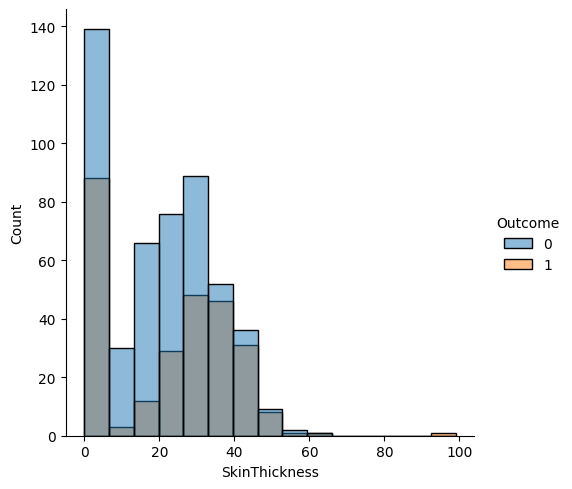

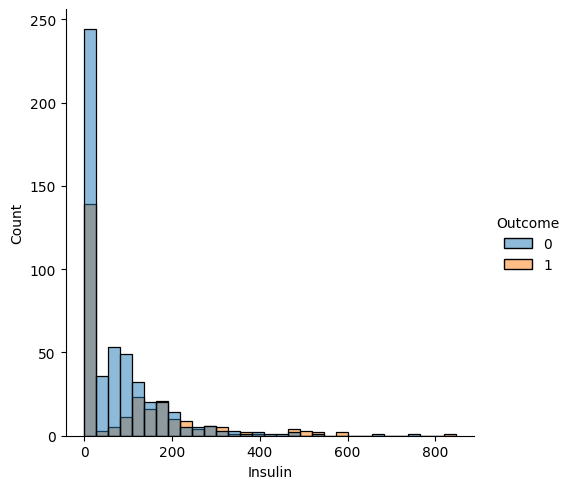

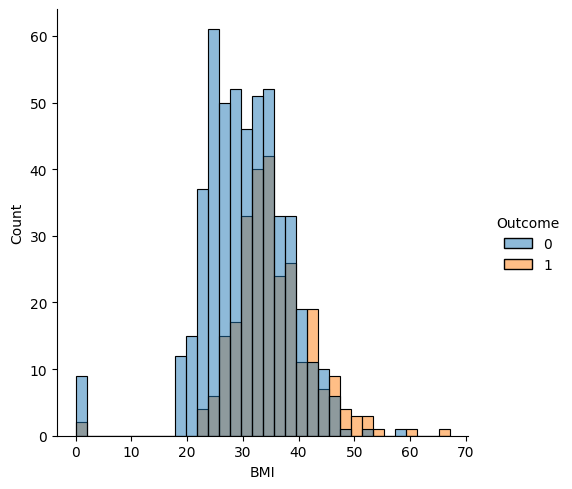

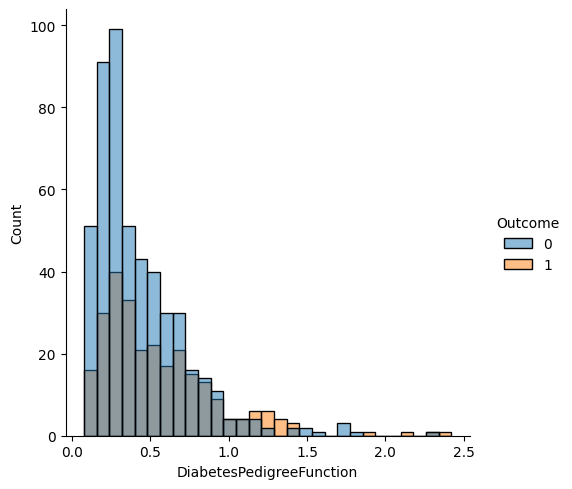

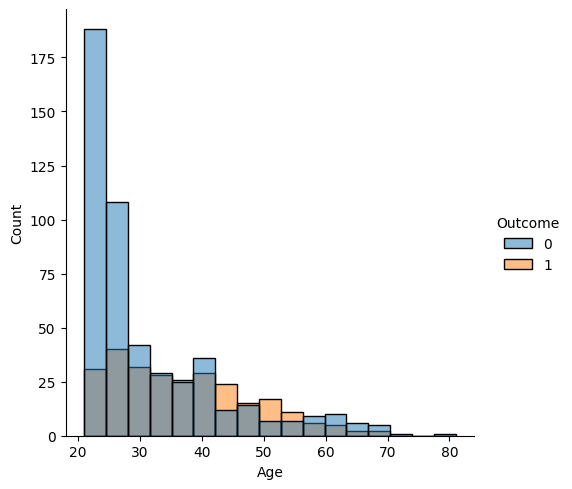

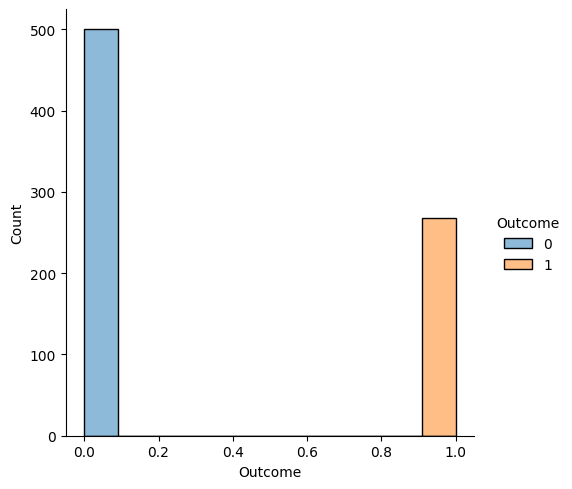

In [13]:
# Histograms for all columns
for column in data.columns:
    sns.displot(data, x=column,hue='Outcome')
    plt.show()
    




From the last plot, we can see that the number of patients who are not diabetic is significantly higher than the number of patients who are diabetic. This indicates that the dataset is imbalanced and biased towards the non-diabetic class.

### Data cleaning

We know that we have some 0 values, let's transform them in NaN values.

In [16]:
# Transforming zero values to NaN
data = data.replace(0, np.nan)

# Checking for missing values
print(data.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [19]:
# Checking for duplicates
print(data.duplicated().sum())

0


KNNImputer imputes the missing values by considering the k-nearest neighbors of the datapoint being imputed. This method often provides better estimates as it leverages the similarity in the dataset.

In [20]:
from sklearn.impute import KNNImputer

In [24]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data)

# Replacing the original data with the imputed data
data = pd.DataFrame(imputed_data, columns=data.columns)

# Verifying that there are no more missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


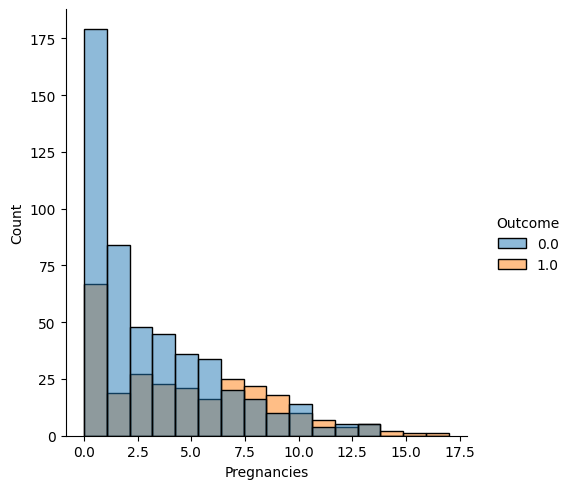

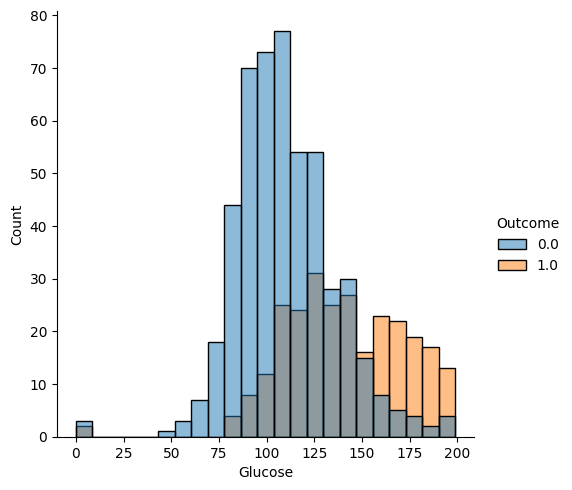

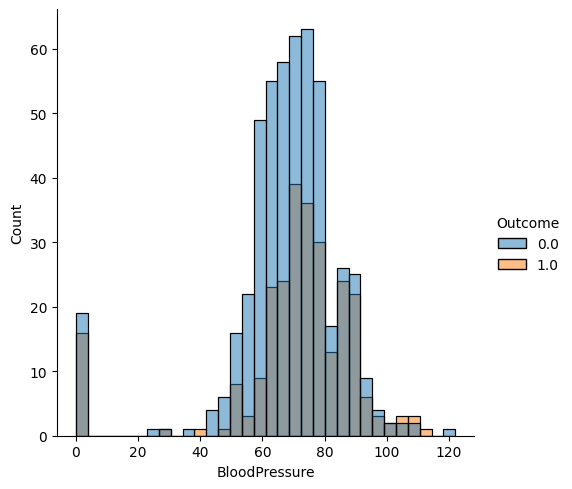

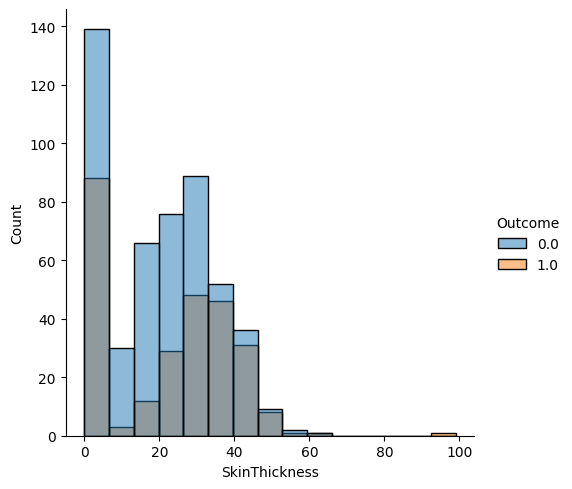

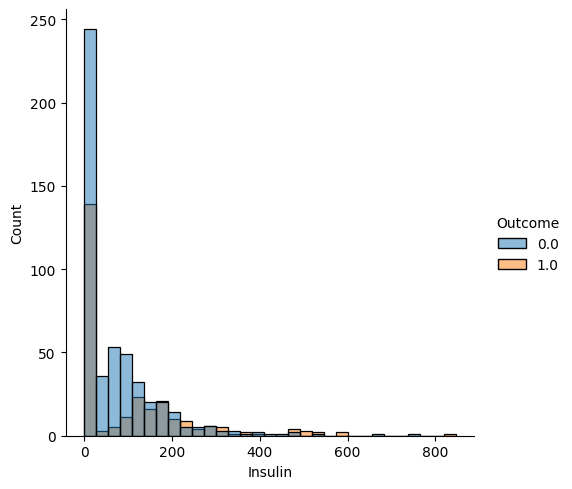

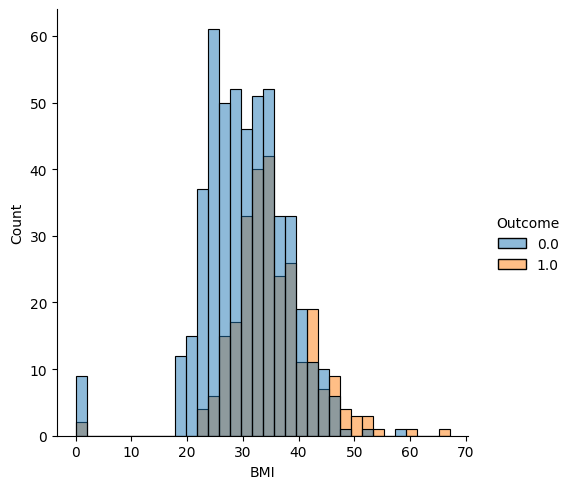

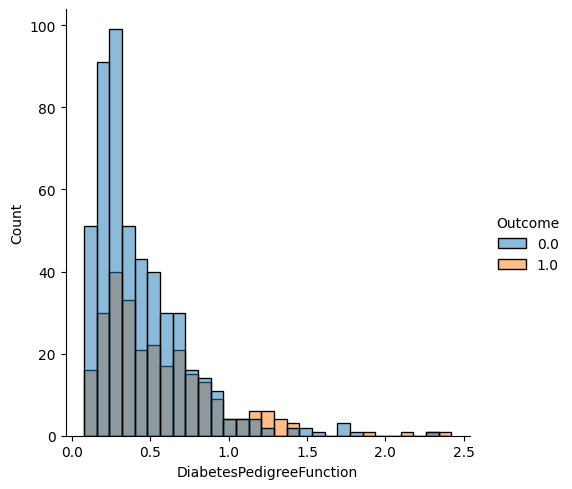

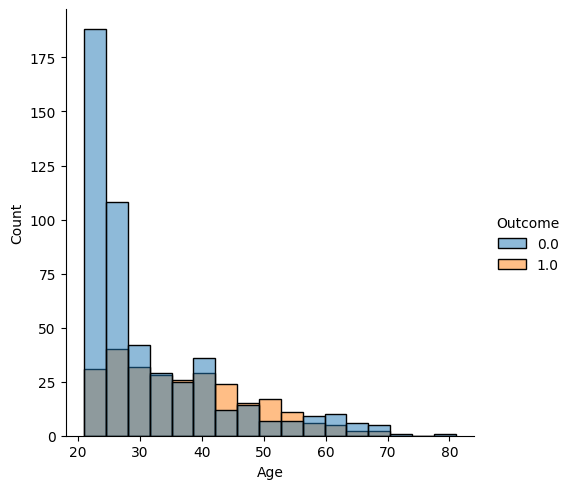

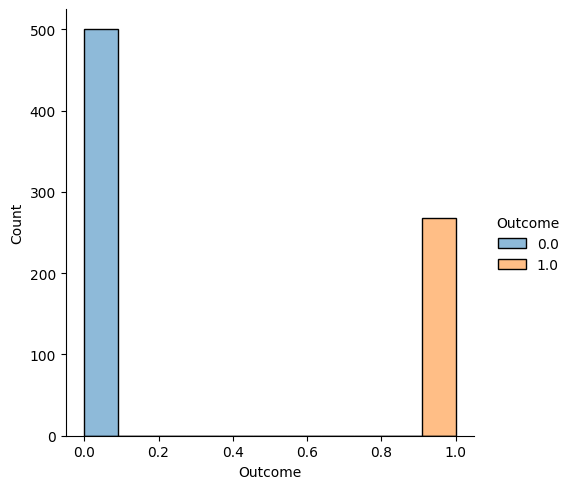

In [26]:
# Let's chech univariate analysis now

for column in data.columns:
    sns.displot(data, x=column,hue='Outcome')
    plt.show()

### Corelation using heatmap

<Axes: >

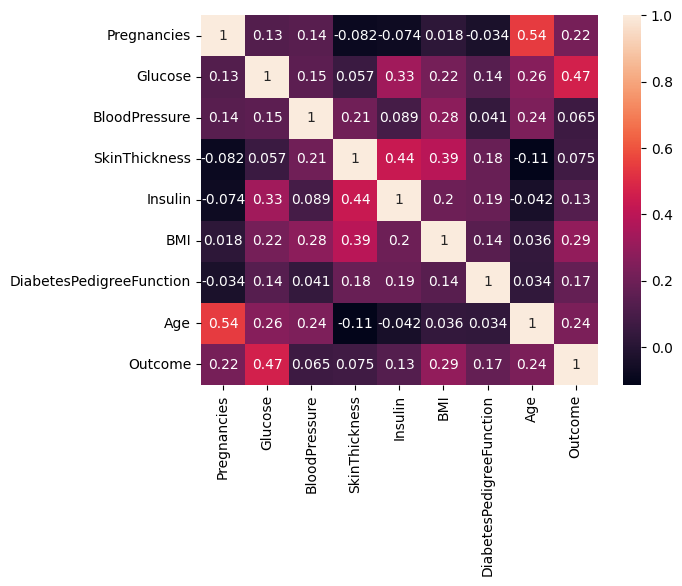

In [28]:
sns.heatmap(data.corr(), annot=True)

We can see that there is a certain corelation with all the features, but highest corelation is with Glucose and BMI.